In [23]:
import torch
import torchvision
import torchvision.transforms as transforms

In [24]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


data2 [tensor([[[[-0.7098, -0.7098, -0.6784,  ..., -0.3647, -0.4667, -0.3255],
          [-0.7098, -0.7098, -0.6784,  ..., -0.1608, -0.1137, -0.1451],
          [-0.7255, -0.7255, -0.6941,  ..., -0.1294, -0.0588,  0.0667],
          ...,
          [-0.4118, -0.4039, -0.3961,  ..., -0.0196,  0.0667,  0.1922],
          [-0.4039, -0.3725, -0.3647,  ..., -0.0353,  0.0431,  0.1137],
          [-0.3647, -0.3647, -0.3490,  ...,  0.0196,  0.1137,  0.1922]],

         [[-0.3098, -0.3333, -0.2706,  ..., -0.4118, -0.4980, -0.3647],
          [-0.3098, -0.3176, -0.2549,  ..., -0.2000, -0.1451, -0.1686],
          [-0.3176, -0.3098, -0.2706,  ..., -0.1765, -0.1137, -0.0039],
          ...,
          [-0.5294, -0.5059, -0.4902,  ..., -0.0118,  0.0980,  0.2314],
          [-0.5059, -0.4745, -0.4667,  ..., -0.0196,  0.0667,  0.1608],
          [-0.4510, -0.4588, -0.4588,  ...,  0.0353,  0.1529,  0.2314]],

         [[-0.0196, -0.0510,  0.0118,  ..., -0.4510, -0.5373, -0.3804],
          [-0.0275, -0.

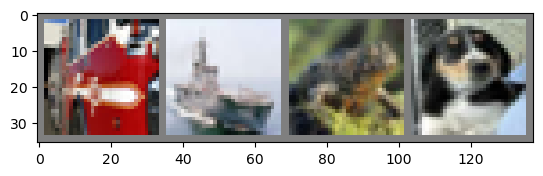

truck ship  frog  dog  


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    print("a", img.shape)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
print("data2", next(dataiter))
print(len(next(dataiter)))
images, labels = next(dataiter)
print(labels)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [33]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [34]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [35]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.211
[1,  4000] loss: 1.882
[1,  6000] loss: 1.673
[1,  8000] loss: 1.584
[1, 10000] loss: 1.477
[1, 12000] loss: 1.482
[2,  2000] loss: 1.406
[2,  4000] loss: 1.351
[2,  6000] loss: 1.326
[2,  8000] loss: 1.341
[2, 10000] loss: 1.281
[2, 12000] loss: 1.282
Finished Training
